## 一、导包，读取数据

In [2]:
import pandas as pd
import numpy as np
file_data = pd.read_csv('./data/lianjia_houses.csv', encoding='gbk')
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500


In [3]:
# 查看数据摘要信息
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   区域       8223 non-null   object
 1   小区名称     8223 non-null   object
 2   户型       8223 non-null   object
 3   面积(㎡)    8223 non-null   object
 4   价格(元/月)  8223 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 321.3+ KB


## 二、数据预处理

In [4]:
# 检测重复记录
file_data[file_data.duplicated() == True]

,区域,小区名称,户型,面积(㎡),价格(元/月)
65,东城,金鱼池东区,2室1厅,66.46平米,6000
66,东城,凯德华玺,2房间1卫,73.86平米,13000
67,东城,沙井胡同,2室1厅,25.15平米,7900
68,东城,沙井胡同,1室1厅,12.3平米,4200
69,东城,安贞苑50号院,2室1厅,65.82平米,6900
...,...,...,...,...,...
8196,顺义,仓上小区,3室1厅,108.03平米,3900
8197,顺义,石园东区,2室1厅,91.93平米,4100
8198,顺义,裕龙三区,1室1厅,69.04平米,3800
8199,顺义,建新北区,2室1厅,50.04平米,3600


In [5]:
# 删除重复记录
file_data = file_data.drop_duplicates(ignore_index=True)
file_data.tail()

,区域,小区名称,户型,面积(㎡),价格(元/月)
5768,顺义,怡馨家园,3室1厅,114.03平米,5500
5769,顺义,旭辉26街区,4房间2卫,59平米,5000
5770,顺义,前进花园玉兰苑,3室1厅,92.41平米,5800
5771,顺义,双裕小区,2室1厅,71.81平米,4200
5772,顺义,樱花园二区,1室1厅,35.43平米,2700


In [6]:
# 查看数据维度
file_data.shape

(5773, 5)

In [7]:
# 数据类型转换1：将‘面积(㎡)’一列，后面的平米文本去除后，类型改为数值型数据
# 方法一：
# file_data['面积(㎡)'] = file_data['面积(㎡)'].apply(lambda x: x[:-2]).astype('float64')
# file_data

In [8]:
# 方法二：
new_arr = np.array([])
for i in file_data['面积(㎡)']:
    new_arr = np.append(new_arr, i[:-2])
new_arr = new_arr.astype(np.float64)
file_data.loc[:,'面积(㎡)'] = new_arr
file_data.tail()

,区域,小区名称,户型,面积(㎡),价格(元/月)
5768,顺义,怡馨家园,3室1厅,114.03,5500
5769,顺义,旭辉26街区,4房间2卫,59.00,5000
5770,顺义,前进花园玉兰苑,3室1厅,92.41,5800
5771,顺义,双裕小区,2室1厅,71.81,4200
5772,顺义,樱花园二区,1室1厅,35.43,2700


In [9]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5773 entries, 0 to 5772
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   区域       5773 non-null   object 
 1   小区名称     5773 non-null   object 
 2   户型       5773 non-null   object 
 3   面积(㎡)    5773 non-null   float64
 4   价格(元/月)  5773 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 225.6+ KB


In [10]:
# 数据类型转换2：将‘户型’一列统一成“*房*厅”格式
file_data['户型'] = file_data['户型'].apply(lambda x: x.replace('房间', '室'))
file_data.tail()

,区域,小区名称,户型,面积(㎡),价格(元/月)
5768,顺义,怡馨家园,3室1厅,114.03,5500
5769,顺义,旭辉26街区,4室2卫,59.00,5000
5770,顺义,前进花园玉兰苑,3室1厅,92.41,5800
5771,顺义,双裕小区,2室1厅,71.81,4200
5772,顺义,樱花园二区,1室1厅,35.43,2700


## 三、数据分析与展示

### 1、房源数据分析：

In [11]:
# 统计各区域的房源数量
# 先按区域分组再聚合房源数量，接着重置索引，更改列索引名，按值降序排序
df_area = file_data.groupby('区域').agg({'小区名称': 'count'}).reset_index().rename(columns=
                                                                              {'小区名称': '数量'}).sort_values('数量', ascending=False)
df_area

,区域,数量
6,朝阳,1597
7,海淀,605
1,丰台,577
10,通州,477
9,西城,442
3,大兴,362
5,昌平,347
12,顺义,297
11,门头沟,285
0,东城,282


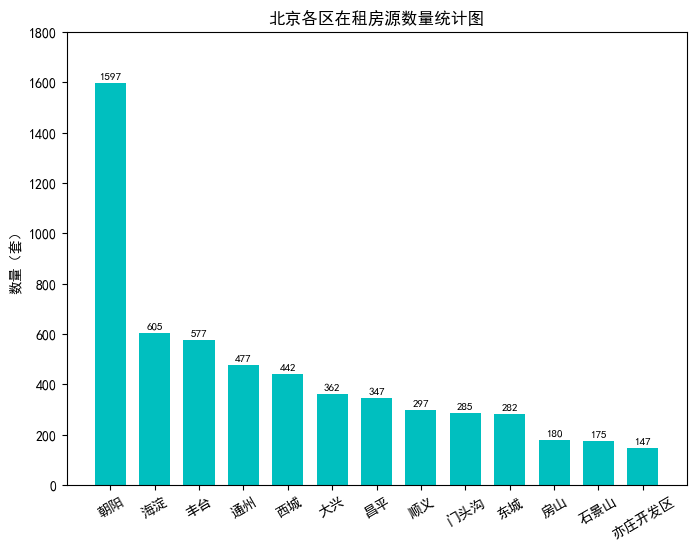

In [18]:
# 将各区域房源数据用柱形图展示
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6), dpi=100)

bar_rect = plt.bar(df_area['区域'], df_area['数量'], color='c', width=0.7)
plt.ylim(0, 1800)
plt.title('北京各区在租房源数量统计图')
plt.ylabel('数量（套）')
plt.xticks(rotation=30)

# 添加注释文本
def autolabel(rects):
    for rect in rects:
        rect_height = rect.get_height()  # 柱子高度
        rect_x = rect.get_x()            # 获取每个柱形的X值
        rect_width = rect.get_width()    # 获取每个柱形的宽度
        plt.text(rect_x + rect_width / 2, rect_height + 10, s='{}'.format(rect_height), ha='center', va='bottom', fontsize=8)
        
autolabel(bar_rect)
plt.show()

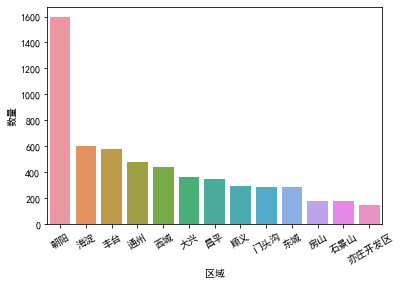

In [25]:
# 用seaborn库画图
import seaborn as sns
sns.barplot(x='区域', y='数量', data=df_area)

plt.xticks(rotation=30)
plt.show()

### 2、户型数量分析

In [20]:
# 生成数量排行前10的户型数据
# 方法一：
df_houses = file_data.groupby('户型').agg({'区域': 'count'}).reset_index().rename(
    columns={'区域': '数量'}).sort_values('数量', ascending=False).iloc[:10, :].reset_index(drop=True)
df_houses

,户型,数量
0,2室1厅,2249
1,1室1厅,844
2,3室1厅,766
3,3室2厅,489
4,2室2厅,265
5,1室0厅,244
6,4室2厅,191
7,1室1卫,126
8,2室1卫,120
9,3室1卫,92


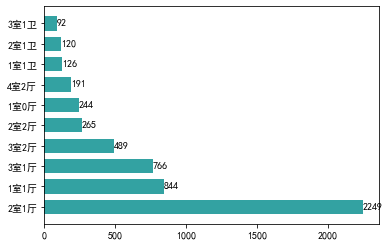

In [23]:
# 将户型数据可视化（条形图）

plt.barh(df_houses['户型'], df_houses['数量'], height=0.7, color='darkcyan', alpha=0.8)

house_type_num = df_houses['数量']

for x, y in enumerate(house_type_num):
    plt.text(y+0.2, x-0.1, '{}'.format(y))
    
plt.show()

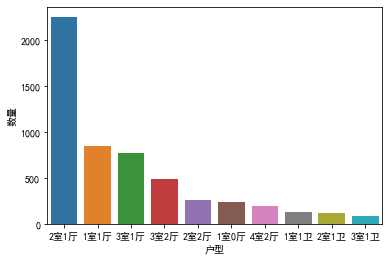

In [78]:
sns.barplot(x='户型', y='数量', data=df_houses)
plt.show()

### 3、统计各区房源平均租金

In [27]:
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
5768,顺义,怡馨家园,3室1厅,114.03,5500
5769,顺义,旭辉26街区,4室2卫,59.00,5000
5770,顺义,前进花园玉兰苑,3室1厅,92.41,5800
5771,顺义,双裕小区,2室1厅,71.81,4200


In [28]:
# 利用分组聚合操作，得到各区在租房源的总面积和房租总价钱。
df_all = file_data.groupby('区域').agg(sum).reset_index().rename(columns={'面积(㎡)': '总面积(㎡)', '价格(元/月)': '房租总金额'})
df_all

,区域,总面积(㎡),房租总金额
0,东城,27353.99,3945550
1,丰台,50922.79,4404893
2,亦庄开发区,15995.53,1318400
3,大兴,35884.15,2286950
4,房山,15275.41,726750
5,昌平,35972.92,2521515
6,朝阳,166921.72,20281396
7,海淀,57210.39,7279350
8,石景山,13956.67,1156500
9,西城,37141.64,5636975


In [29]:
# 增加‘每平米租金（元）’一列，并保留两位小数
# 方法一：
df_all['每平米租金（元）'] = round(df_all['房租总金额'] / df_all['总面积(㎡)'], 2)
df_all
# 方法二：    
# df_all['每平米租金（元）'] = df_all.apply(lambda x: round(x['房租总金额']/x['总面积(㎡)'], 2), axis=1)
# df_all

,区域,总面积(㎡),房租总金额,每平米租金（元）
0,东城,27353.99,3945550,144.24
1,丰台,50922.79,4404893,86.50
2,亦庄开发区,15995.53,1318400,82.42
3,大兴,35884.15,2286950,63.73
4,房山,15275.41,726750,47.58
5,昌平,35972.92,2521515,70.09
6,朝阳,166921.72,20281396,121.50
7,海淀,57210.39,7279350,127.24
8,石景山,13956.67,1156500,82.86
9,西城,37141.64,5636975,151.77


In [31]:
# 合并df_all和df_area两个数据框
df_merge = pd.merge(df_area, df_all, on='区域', how='inner')
df_merge

,区域,数量,总面积(㎡),房租总金额,每平米租金（元）
0,朝阳,1597,166921.72,20281396,121.50
1,海淀,605,57210.39,7279350,127.24
2,丰台,577,50922.79,4404893,86.50
3,通州,477,46625.23,2719600,58.33
4,西城,442,37141.64,5636975,151.77
5,大兴,362,35884.15,2286950,63.73
6,昌平,347,35972.92,2521515,70.09
7,顺义,297,33668.97,2190900,65.07
8,门头沟,285,20258.20,1048300,51.75
9,东城,282,27353.99,3945550,144.24


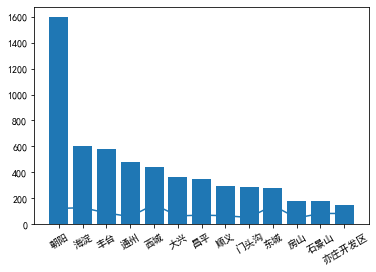

In [111]:
# 用图表方式来展示各区房源数量及平均租金
# 单独用柱形图展示房源数量
plt.bar(df_merge['区域'], df_merge['数量'])
plt.xticks(rotation=30)
plt.show()

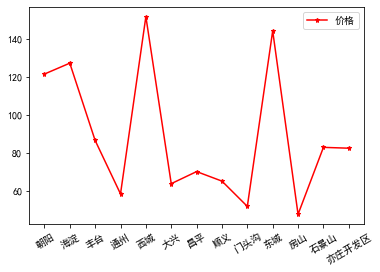

In [33]:
# 单独用折线图展示各区平均租金(㎡)
plt.plot(df_merge['区域'], df_merge['每平米租金（元）'], marker='*', ms=5, color='r', label='价格')
plt.xticks(rotation=30)
plt.legend()
plt.show()

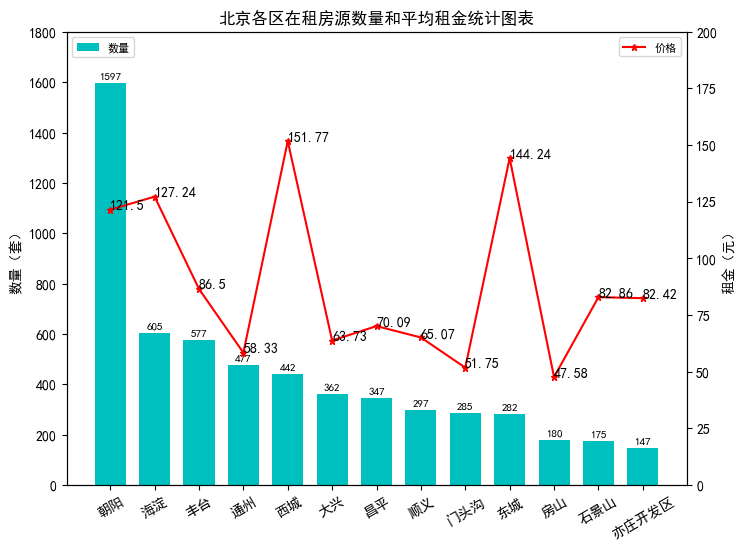

In [36]:
# 将各区域房源数据用柱形图展示
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
# 创建一个画布
fig = plt.figure(figsize=(8, 6), dpi=100)
# 创建一个与画布同等大小的绘图区域
ax1 = fig.add_subplot(1, 1, 1)
bar_rect = ax1.bar(df_area['区域'], df_area['数量'], color='c', width=0.7, label='数量')
plt.ylim(0, 1800)
plt.ylabel('数量（套）')
plt.xticks(rotation=30)

# 添加注释文本
def autolabel(rects):
    for rect in rects:
        rect_height = rect.get_height()  # 柱子高度
        rect_x = rect.get_x()            # 获取每个柱形的X值
        rect_width = rect.get_width()    # 获取每个柱形的宽度
        plt.text(rect_x + rect_width / 2, rect_height + 10, s='{}'.format(rect_height), ha='center', va='bottom', fontsize=8)
        
autolabel(bar_rect)
# 添加图例，设置图例的位置和文本字体大小
plt.legend(prop={'size': 8}, loc='upper left')



# 生成另一个与ax1共享X轴的绘图区域
l = [i for i in range(df_merge['区域'].values.size)]
price = df_merge['每平米租金（元）']
ax2 = ax1.twinx()
ax2.plot(df_merge['区域'], df_merge['每平米租金（元）'], marker='*', ms=5, color='r', label='价格')
# 在数据点上标上平均租金文本
for i, (_x, _y) in enumerate(zip(l, price)):
    plt.text(_x, _y, price[i], color='black', fontsize=10)

ax2.set_ylim([0, 200])
ax2.set_ylabel('租金（元）')
plt.legend(prop={'size': 8}, loc='upper right')


plt.title('北京各区在租房源数量和平均租金统计图表')
plt.show()

### 4、房源面积区间分析

In [123]:
# 查看房源的最小面积和最大面积
print('最小面积为：{}'.format(file_data['面积(㎡)'].min()))
print('最大面积为：{}'.format(file_data['面积(㎡)'].max()))    

最小面积为：11.63
最大面积为：1133.0


In [129]:
# 面积划分
area_divide = [1, 30, 50, 70, 90, 120, 140, 160, 1200]
area_cut_data = pd.cut(list(file_data['面积(㎡)']), bins=area_divide).describe()
area_cut_data

,counts,freqs
categories,,
"(1, 30]",41,0.007102
"(30, 50]",710,0.122986
"(50, 70]",1566,0.271263
"(70, 90]",1094,0.189503
"(90, 120]",1082,0.187424
"(120, 140]",381,0.065997
"(140, 160]",274,0.047462
"(160, 1200]",625,0.108263


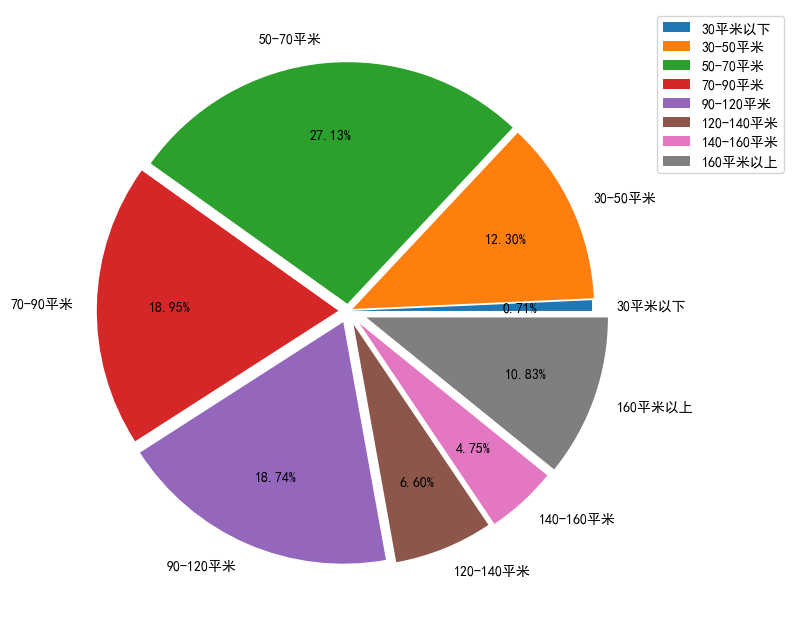

In [138]:
# 通过饼图一展示各面积区间的占比情况
import numpy as np
plt.figure(figsize=(10,8), dpi=100)
area_percentage = (area_cut_data['freqs'].values) * 100
labels = ['30平米以下', '30-50平米', '50-70平米', '70-90平米', '90-120平米', '120-140平米', '140-160平米', '160平米以上']
explode = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]
plt.pie(area_percentage, labels=labels, autopct='%.2f%%', pctdistance=0.7, explode=explode)
plt.legend(bbox_to_anchor=(1, 1))  # 图形区域的右上角
plt.show()

In [136]:
plt.pie?